# Test changing the order of components

In [1]:
from modeling.compute import Var
from modeling.couplingapi import Subproblem, intersection
from modeling.execution import edges_from_components
from graph.matrixview import render_incidence
from graph.graphutils import flat_graph_formulation, VAR, COMP, SOLVER
from graph.graphutils import draw_graph_graphical_props

In [2]:
x,c,d,a,b = Var('x'), Var('c'), Var('d'), Var('a'), Var('b')
y = Var('y')

In [3]:
m = Subproblem()
m.add_equation(None, -a+c+y)
m.add_equation(None, -y+x)
b = m.Var('b', a)
e = m.Var('e', c+b)

In [4]:
edges = edges_from_components(m.components)
forceorder = [2,1,0,3]
tree = {key:1 for key in forceorder}, {1:2}, {'a':1, 'y':1}

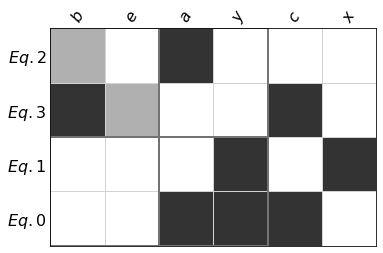

In [5]:
render_incidence(edges, tree, rawvarname=True, indentsolver=False, 
                 hideticks=True);

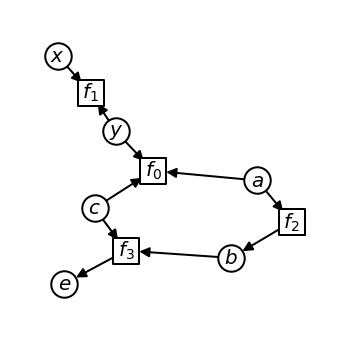

In [6]:
nodetyperepr={VAR: '{}', COMP: 'f_{}', SOLVER: 's_{}'}
G = flat_graph_formulation(*edges, nodetyperepr)
draw_graph_graphical_props(G)

# Old syntax to review


```python
addsolver(m, [f_2, f_3], [(f1, a), (f0, y)], name='s1') # could still be cyclic at this point
addsolver(m, [f_0, f_1, f_2, s2], [(r_3, c)], name='s1') # could still be cyclic at this point
```